<a href="https://colab.research.google.com/github/Abinaya9705/Analysis-of-Population-Distributions/blob/main/Data_Visualization_and_Statistical_Analysis_of_Population_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas numpy scikit-learn matplotlib seaborn


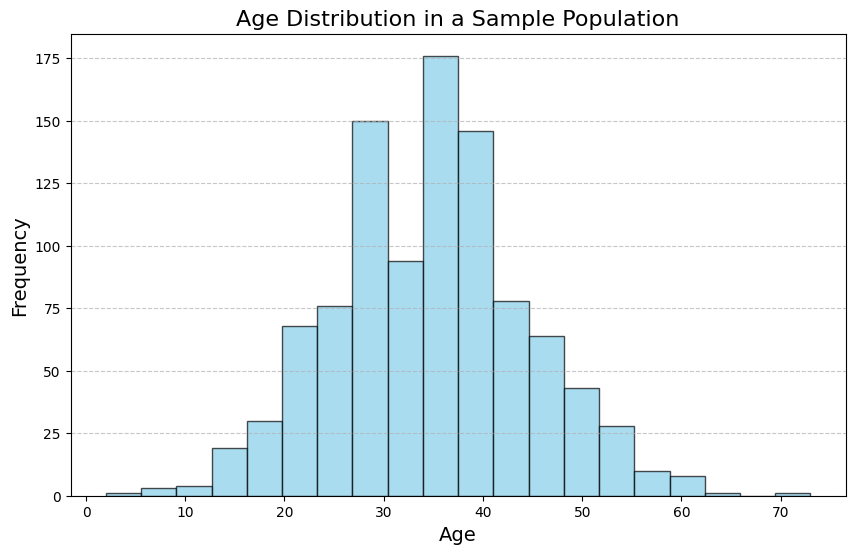

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a dataset: ages of a sample population
np.random.seed(42)
ages = np.random.normal(loc=35, scale=10, size=1000).astype(int)
ages = ages[ages > 0]  # Remove non-positive ages

# Create a histogram for age distribution
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution in a Sample Population', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


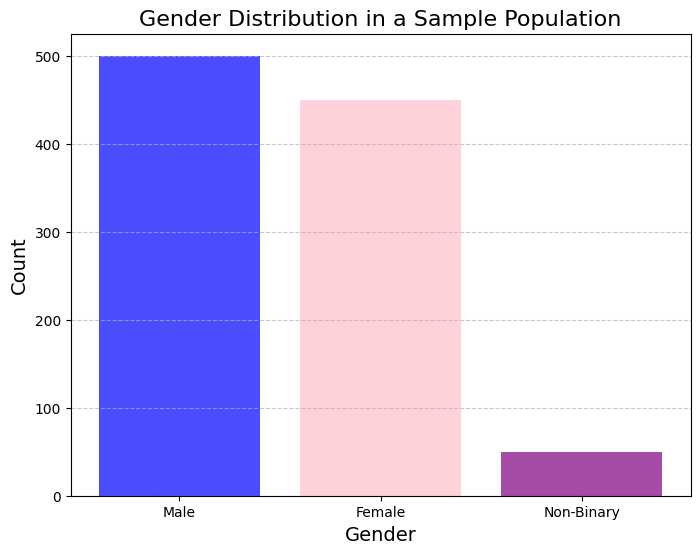

In [6]:
import matplotlib.pyplot as plt

# Simulate a dataset: genders in a sample population
genders = ["Male", "Female", "Non-Binary"]
counts = [500, 450, 50]  # Example counts

# Create a bar chart for gender distribution
plt.figure(figsize=(8, 6))
plt.bar(genders, counts, color=['blue', 'pink', 'purple'], alpha=0.7)
plt.title('Gender Distribution in a Sample Population', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-7-18d58efbedf6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette=['blue', 'pink', 'purple'])


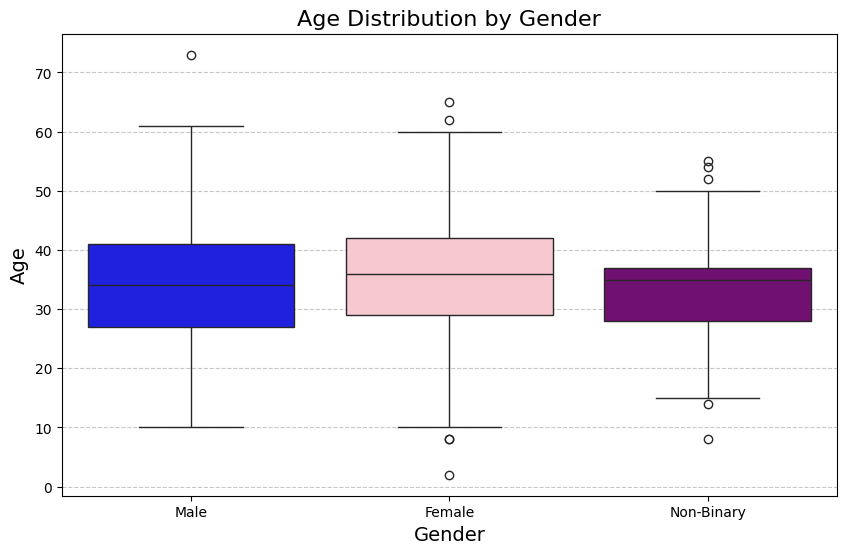

<ipython-input-7-18d58efbedf6>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == gender]['Age'], label=gender, shade=True)
<ipython-input-7-18d58efbedf6>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == gender]['Age'], label=gender, shade=True)
<ipython-input-7-18d58efbedf6>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == gender]['Age'], label=gender, shade=True)


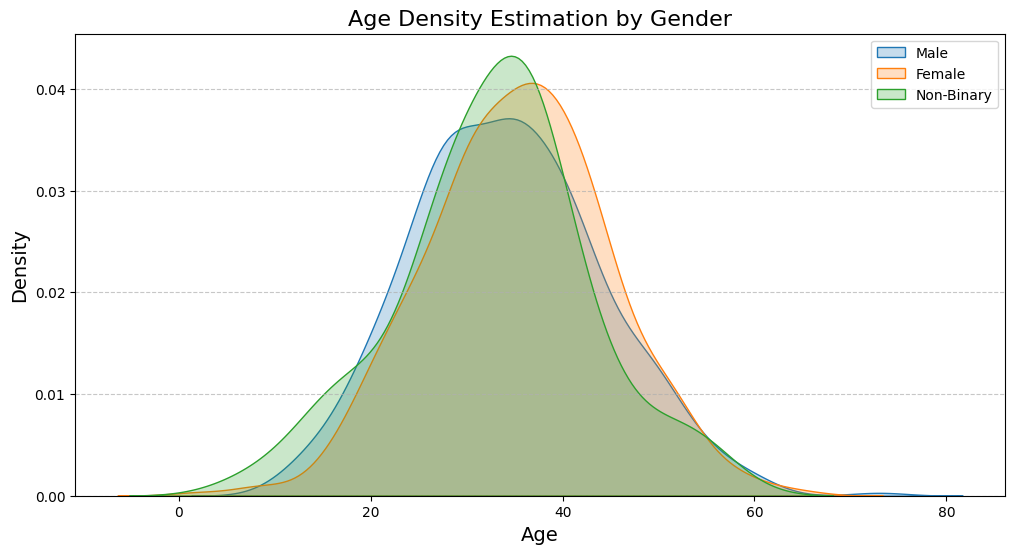

In [7]:
import pandas as pd
import seaborn as sns

# 1. Create a DataFrame:
data = {'Age': ages, 'Gender': np.random.choice(genders, size=len(ages), p=[0.5, 0.45, 0.05])}
df = pd.DataFrame(data)

# 2. Analyze Age by Gender:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette=['blue', 'pink', 'purple'])
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Explore Age Distribution within Gender:
plt.figure(figsize=(12, 6))
for gender in genders:
    sns.kdeplot(df[df['Gender'] == gender]['Age'], label=gender, shade=True)
plt.title('Age Density Estimation by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Correlation (if applicable):
# If you have other numerical variables, you can explore correlations:
# df['NewVariable'] = ...  # Add a new numerical variable
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix', fontsize=16)
# plt.show()

<ipython-input-8-eecf761cddd1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Age_Group', 'Gender'])['Age'].count().reset_index()


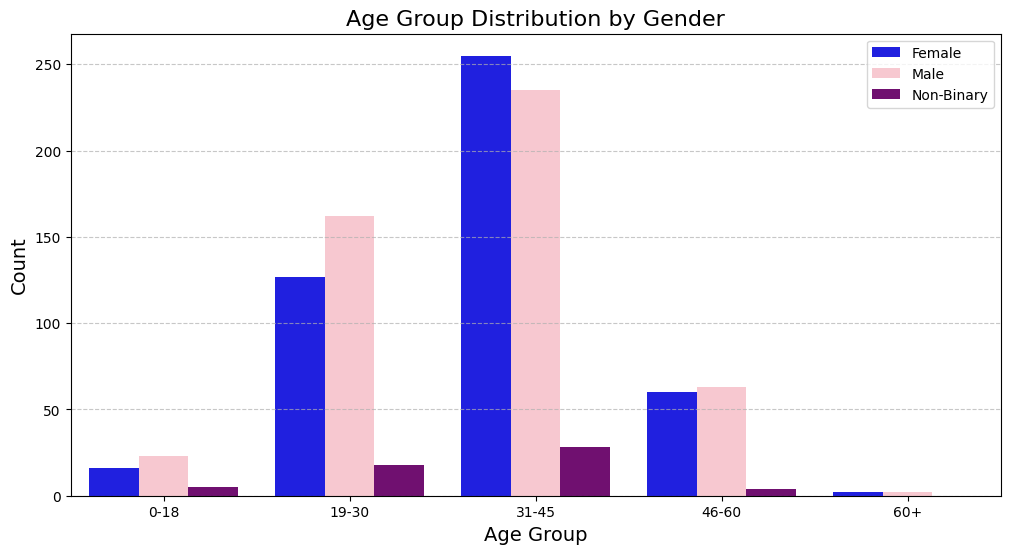

T-statistic: -1.83
P-value: 0.067


In [8]:
# 1. Age Group Analysis:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100],
                          labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Visualization:
age_group_counts = df.groupby(['Age_Group', 'Gender'])['Age'].count().reset_index()
age_group_counts.rename(columns={'Age': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Count', hue='Gender', data=age_group_counts,
            palette=['blue', 'pink', 'purple'])
plt.title('Age Group Distribution by Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Statistical Analysis:
from scipy import stats

# Example: T-test to compare age between two genders
male_ages = df[df['Gender'] == 'Male']['Age']
female_ages = df[df['Gender'] == 'Female']['Age']
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpretation:
# If p-value is less than your significance level (e.g., 0.05),
# you would reject the null hypothesis that there is no difference
# in age between the two genders.

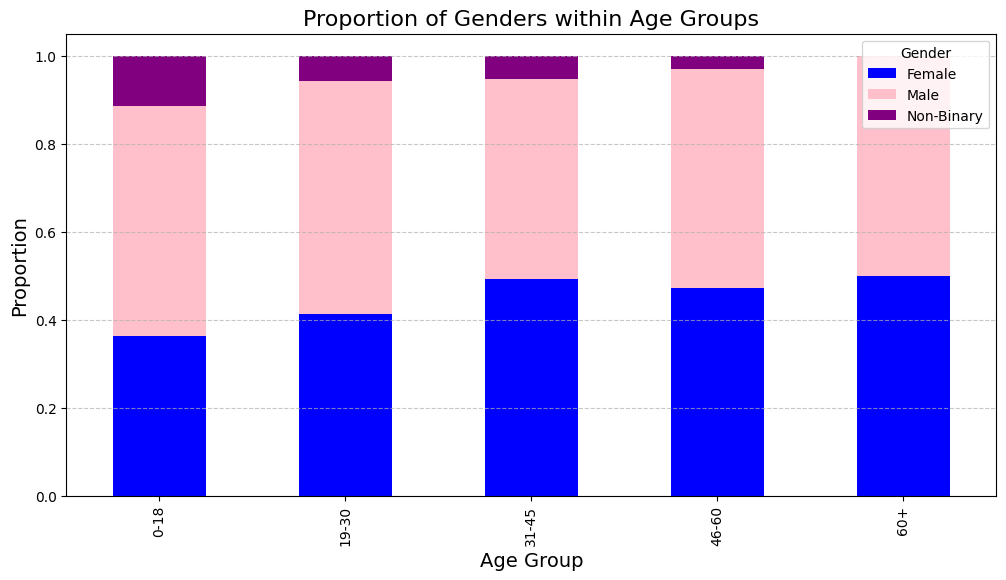

In [13]:
# 1. Proportion Visualization:

# Calculate proportions of each gender within age groups
# Suppress the FutureWarning by explicitly setting observed=False
age_group_proportions = age_group_counts.groupby('Age_Group', observed=False)['Count'].apply(
    lambda x: x / x.sum()
).reset_index()

# Group by both Age_Group and Gender to get unique combinations before calculating proportions
age_group_proportions = age_group_counts.groupby(['Age_Group', 'Gender'], observed=False)['Count'].sum().reset_index()
age_group_proportions['Proportion'] = age_group_proportions.groupby('Age_Group', observed=False)['Count'].transform(lambda x: x / x.sum())


# Pivot the data for stacked bar plot
age_group_proportions = age_group_proportions.pivot(
    index='Age_Group', columns='Gender', values='Proportion'
).fillna(0)

# Create a stacked bar plot
age_group_proportions.plot(kind='bar', stacked=True, figsize=(12, 6),
                           color=['blue', 'pink', 'purple'])
plt.title('Proportion of Genders within Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

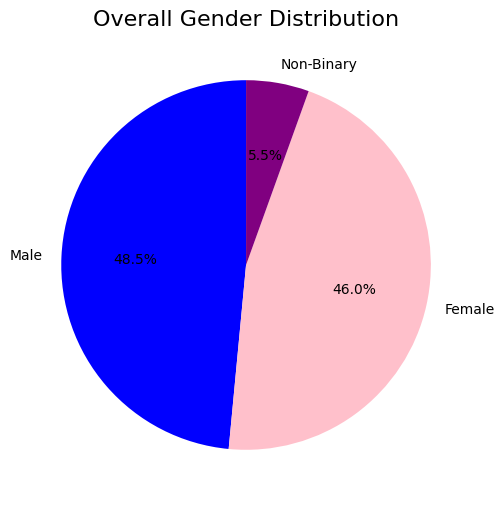


Age Statistics for Male:
count    485.000000
mean      34.212371
std        9.994950
min       10.000000
25%       27.000000
50%       34.000000
75%       41.000000
max       73.000000
Name: Age, dtype: float64

Age Statistics for Female:
count    460.000000
mean      35.378261
std        9.549799
min        2.000000
25%       29.000000
50%       36.000000
75%       42.000000
max       65.000000
Name: Age, dtype: float64

Age Statistics for Non-Binary:
count    55.000000
mean     32.854545
std       9.789295
min       8.000000
25%      28.000000
50%      35.000000
75%      37.000000
max      55.000000
Name: Age, dtype: float64


<ipython-input-14-97e4e59fe054>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, palette=['blue', 'pink', 'purple'])


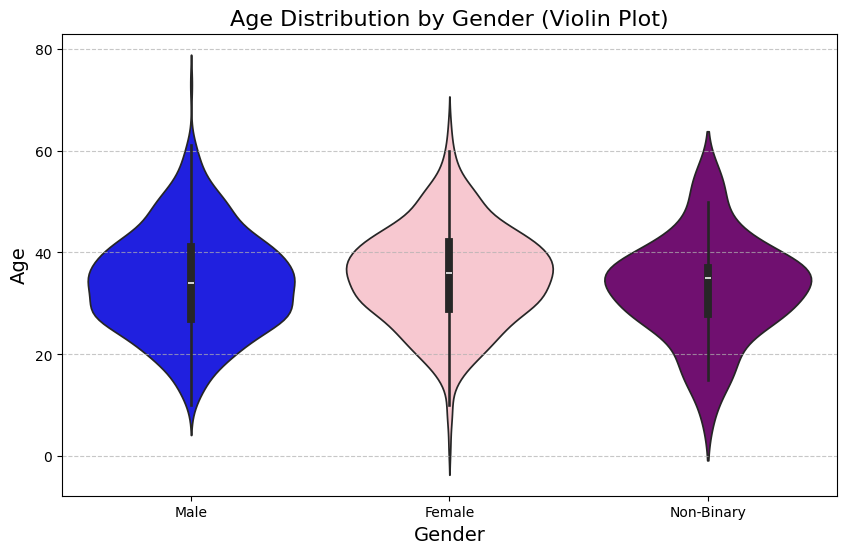

In [14]:
# Further Analysis and Visualization:

# 1. Pie Chart for Overall Gender Distribution:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink', 'purple'], startangle=90)
plt.title('Overall Gender Distribution', fontsize=16)
plt.show()

# 2. Age Distribution Statistics by Gender:
for gender in genders:
    print(f"\nAge Statistics for {gender}:")
    print(df[df['Gender'] == gender]['Age'].describe())

# 3. Violin Plot for Age Distribution by Gender:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=df, palette=['blue', 'pink', 'purple'])
plt.title('Age Distribution by Gender (Violin Plot)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Exploring Relationships with Other Variables (if available):
# If you have other variables in your dataset, you can explore their relationships
# with age and gender using techniques like:
#   - Scatter plots (for numerical variables)
#   - Grouped bar charts (for categorical variables)
#   - Correlation analysis
#   - Regression analysis

# Example: Scatter plot of Age vs. Hypothetical Income
# if 'Income' in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x='Age', y='Income', hue='Gender', data=df, palette=['blue', 'pink', 'purple'])
#     plt.title('Age vs. Income by Gender', fontsize=16)
#     plt.xlabel('Age', fontsize=14)
#     plt.ylabel('Income', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# 5. Statistical Tests for Differences in Age by Gender:
# You can use statistical tests like ANOVA (for more than two groups)
# or t-tests (for two groups) to determine if there are significant differences
# in age between different genders or gender categories.

# Example: ANOVA test for age differences across all genders
# from scipy import stats
# fvalue, pvalue = stats.f_oneway(
#     df[df['Gender'] == 'Male']['Age'],
#     df[df['Gender'] == 'Female']['Age'],
#     df[df['Gender'] == 'Non-Binary']['Age']
# )
# print(f"F-statistic: {fvalue:.2f}")
# print(f"P-value: {pvalue:.3f}")

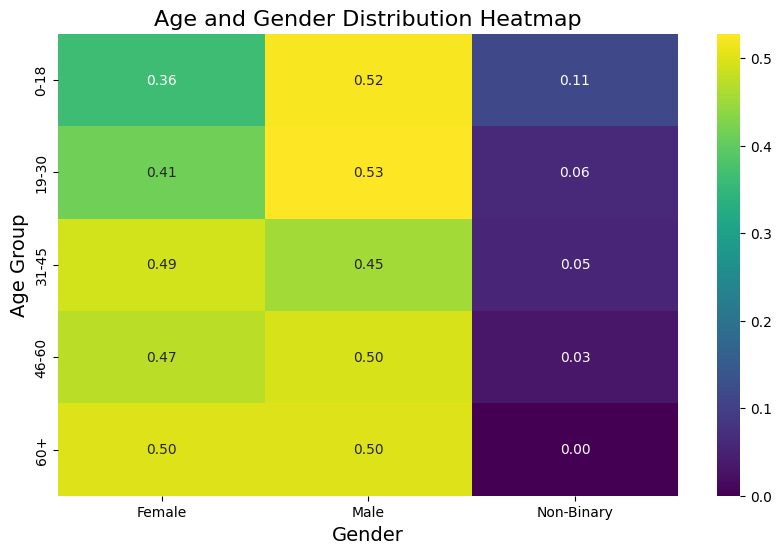

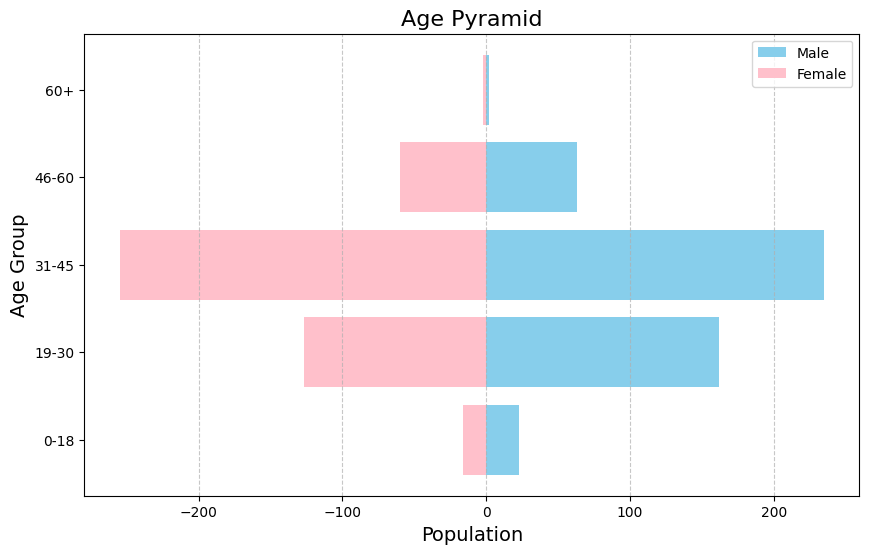

Chi-Squared Statistic: 10.24
P-value: 0.248


In [15]:
# Advanced Analysis and Visualization:

# 1. Age and Gender Distribution with Heatmap:
age_gender_heatmap = pd.crosstab(df['Age_Group'], df['Gender'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_heatmap, annot=True, cmap='viridis', fmt=".2f")
plt.title('Age and Gender Distribution Heatmap', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

# 2. Age Pyramid:
# Create separate DataFrames for males and females
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate age group counts for males and females
male_age_counts = male_data['Age_Group'].value_counts().sort_index()
female_age_counts = female_data['Age_Group'].value_counts().sort_index()

# Create age pyramid plot
plt.figure(figsize=(10, 6))
plt.barh(male_age_counts.index, male_age_counts.values, color='skyblue', label='Male')
plt.barh(female_age_counts.index, -female_age_counts.values, color='pink', label='Female')
plt.title('Age Pyramid', fontsize=16)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Hypothesis Testing with Chi-Squared Test:
# Test for independence between age group and gender
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Age_Group'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")

# 4. Clustering Analysis (if applicable):
# If you have more numerical variables, you can try clustering algorithms
# to group individuals based on their age, gender, and other characteristics.

# Example: K-Means clustering
# from sklearn.cluster import KMeans
# features = df[['Age', 'Other_Numerical_Variable']]  # Select relevant features
# kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
# df['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Age', y='Other_Numerical_Variable', hue='Cluster', data=df, palette='viridis')
# plt.title('K-Means Clustering', fontsize=16)
# plt.xlabel('Age', fontsize=14)
# plt.ylabel('Other Numerical Variable', fontsize=14)
# plt.show()

<ipython-input-16-e1d7757fd3d3>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_ratio_by_age = age_group_counts.groupby('Age_Group')['Gender'].value_counts(normalize=True).unstack()


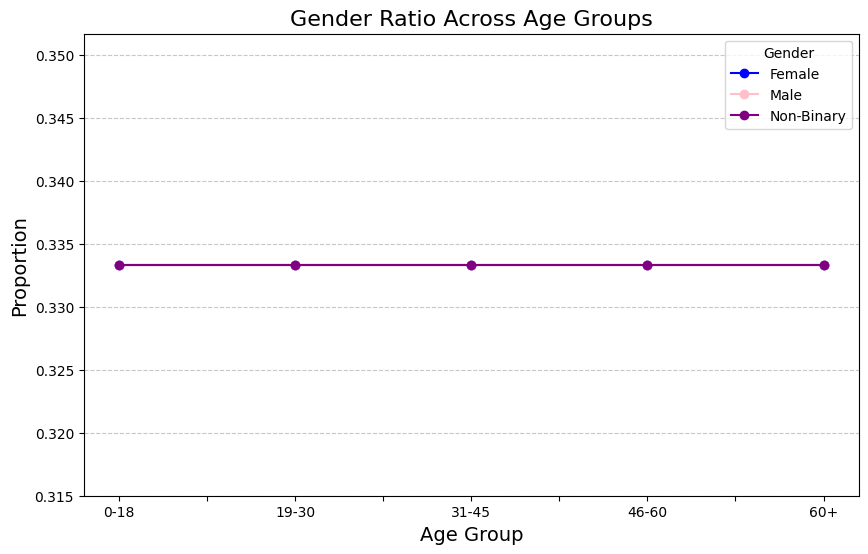

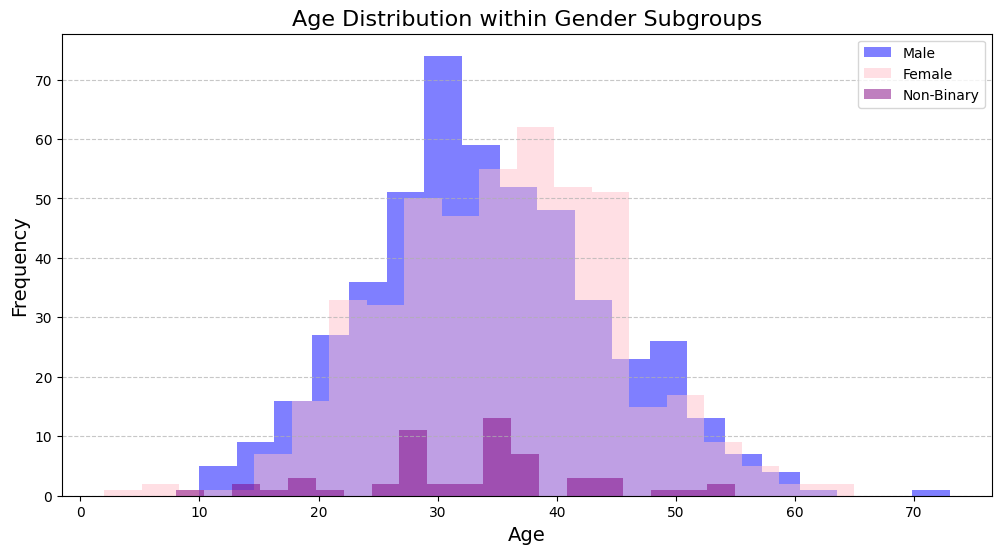

In [16]:
# Advanced Analysis and Visualization Continued:

# 5. Gender Ratio Across Age Groups (Line Plot):
gender_ratio_by_age = age_group_counts.groupby('Age_Group')['Gender'].value_counts(normalize=True).unstack()
gender_ratio_by_age.plot(kind='line', marker='o', figsize=(10, 6), color=['blue', 'pink', 'purple'])
plt.title('Gender Ratio Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()


# 6. Age Distribution within Gender Subgroups (Histograms):
plt.figure(figsize=(12, 6))
for gender in genders:
    plt.hist(df[df['Gender'] == gender]['Age'], bins=20, alpha=0.5, label=gender, color=['blue', 'pink', 'purple'][genders.index(gender)])
plt.title('Age Distribution within Gender Subgroups', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 7. Predictive Modeling (if applicable):
# If you have other variables and a specific outcome you want to predict,
# you can build predictive models using machine learning algorithms.

# Example: Predicting Age Group using Gender and another variable
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
#
# # Assume 'Other_Variable' is a relevant feature
# features = df[['Gender', 'Other_Variable']]
# target = df['Age_Group']
#
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#
# model = LogisticRegression()
# model.fit(X_train, y_train)
#
# accuracy = model.score(X_test, y_test)
# print(f"Model Accuracy: {accuracy:.2f}")

In [17]:
# Further Advanced Analysis and Visualization:

# 8. Age-Gender Interaction Effects:
# Explore how the relationship between age and another variable
# might differ between genders.

# Example: Age and Hypothetical Income by Gender (Scatter Plot with Regression Lines)
# if 'Income' in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.lmplot(x='Age', y='Income', hue='Gender', data=df, palette=['blue', 'pink', 'purple'])
#     plt.title('Age vs. Income by Gender with Regression Lines', fontsize=16)
#     plt.xlabel('Age', fontsize=14)
#     plt.ylabel('Income', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# 9. Time-Series Analysis (if applicable):
# If you have data collected over time, you can analyze trends
# in age and gender distributions over different time periods.

# Example: Age Distribution Over Time (Line Plot)
# if 'Year' in df.columns:
#     age_by_year = df.groupby('Year')['Age'].mean().reset_index()
#     plt.figure(figsize=(10, 6))
#     plt.plot(age_by_year['Year'], age_by_year['Age'], marker='o')
#     plt.title('Average Age Over Time', fontsize=16)
#     plt.xlabel('Year', fontsize=14)
#     plt.ylabel('Average Age', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# 10. Geographical Analysis (if applicable):
# If you have location data, you can explore age and gender
# distributions across different geographical regions.

# Example: Gender Distribution by Region (Bar Chart)
# if 'Region' in df.columns:
#     gender_by_region = df.groupby('Region')['Gender'].value_counts(normalize=True).unstack()
#     gender_by_region.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink', 'purple'])
#     plt.title('Gender Distribution by Region', fontsize=16)
#     plt.xlabel('Region', fontsize=14)
#     plt.ylabel('Proportion', fontsize=14)
#     plt.legend(title='Gender')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

In [18]:
# Further Advanced Analysis and Visualization (Continued):

# 11. Survival Analysis (if applicable):
# If you have data on events (e.g., customer churn, product failure)
# and the time to those events, you can perform survival analysis to
# understand how age and gender influence the time to event.

# Example: Kaplan-Meier Survival Curves by Gender
# !pip install lifelines
# from lifelines import KaplanMeierFitter

# if 'Event' in df.columns and 'Time_to_Event' in df.columns:
#     kmf = KaplanMeierFitter()
#     for gender in genders:
#         kmf.fit(df[df['Gender'] == gender]['Time_to_Event'],
#                 event_observed=df[df['Gender'] == gender]['Event'],
#                 label=gender)
#         kmf.plot()
#     plt.title('Kaplan-Meier Survival Curves by Gender', fontsize=16)
#     plt.xlabel('Time', fontsize=14)
#     plt.ylabel('Survival Probability', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# 12. Cohort Analysis (if applicable):
# If you have data on user cohorts (e.g., users acquired in different months),
# you can analyze how age and gender distributions change within cohorts
# over time.

# Example: Average Age of Cohorts Over Time
# if 'Cohort' in df.columns and 'Time_Since_Acquisition' in df.columns:
#     cohort_age = df.groupby(['Cohort', 'Time_Since_Acquisition'])['Age'].mean().reset_index()
#     plt.figure(figsize=(10, 6))
#     sns.lineplot(x='Time_Since_Acquisition', y='Age', hue='Cohort', data=cohort_age)
#     plt.title('Average Age of Cohorts Over Time', fontsize=16)
#     plt.xlabel('Time Since Acquisition', fontsize=14)
#     plt.ylabel('Average Age', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# 13. Network Analysis (if applicable):
# If you have data on relationships between individuals (e.g., social networks),
# you can analyze how age and gender influence network structure and dynamics.
# This requires specialized libraries and techniques.

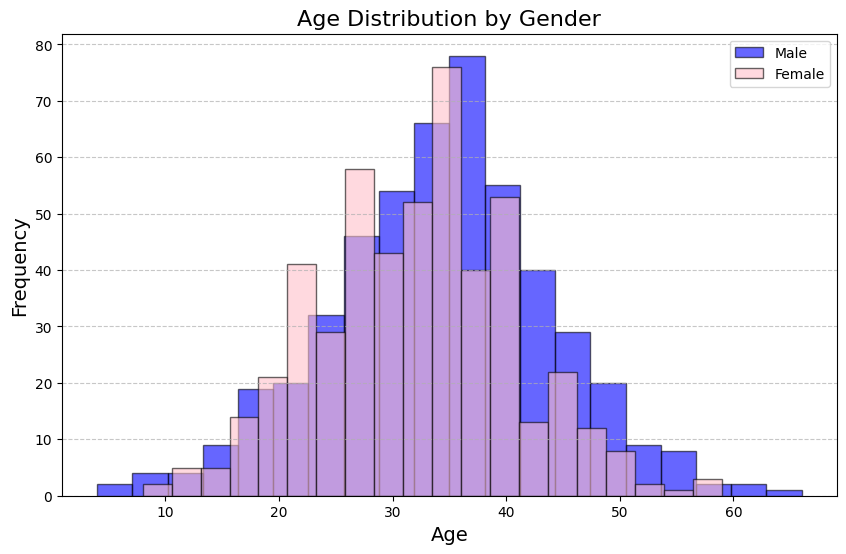

In [19]:
# Simulate age data for two genders
ages_male = np.random.normal(loc=35, scale=10, size=500).astype(int)
ages_female = np.random.normal(loc=32, scale=9, size=500).astype(int)

# Remove non-positive ages
ages_male = ages_male[ages_male > 0]
ages_female = ages_female[ages_female > 0]

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(ages_male, bins=20, alpha=0.6, label="Male", color='blue', edgecolor='black')
plt.hist(ages_female, bins=20, alpha=0.6, label="Female", color='pink', edgecolor='black')
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
import pandas as pd

# Combine age data into a DataFrame
data = {
    "Age": np.concatenate([ages_male, ages_female]),
    "Gender": ["Male"] * len(ages_male) + ["Female"] * len(ages_female)
}
df = pd.DataFrame(data)

# Calculate summary statistics
summary_stats = df.groupby("Gender")["Age"].describe()
print(summary_stats)


        count    mean       std  min   25%   50%   75%   max
Gender                                                      
Female  500.0  32.040  8.650553  8.0  26.0  32.0  38.0  59.0
Male    500.0  34.206  9.771106  4.0  28.0  34.0  41.0  66.0


In [21]:
import plotly.express as px

# Create a histogram for the combined dataset
fig = px.histogram(df, x="Age", color="Gender", barmode="overlay", title="Age Distribution by Gender")
fig.update_layout(xaxis_title="Age", yaxis_title="Frequency", template="plotly_white")
fig.show()


In [22]:
# Save the overlapping histogram as an image
plt.figure(figsize=(10, 6))
plt.hist(ages_male, bins=20, alpha=0.6, label="Male", color='blue', edgecolor='black')
plt.hist(ages_female, bins=20, alpha=0.6, label="Female", color='pink', edgecolor='black')
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age_distribution_by_gender.png', dpi=300)
plt.close()


In [24]:
# Install Streamlit if not already installed
!pip install streamlit

# Import necessary libraries
import streamlit as st
import plotly.express as px
import pandas as pd
import numpy as np

# Simulate age data for two genders
ages_male = np.random.normal(loc=35, scale=10, size=500).astype(int)
ages_female = np.random.normal(loc=32, scale=9, size=500).astype(int)

# Remove non-positive ages
ages_male = ages_male[ages_male > 0]
ages_female = ages_female[ages_female > 0]

# Combine age data into a DataFrame
data = {
    "Age": np.concatenate([ages_male, ages_female]),
    "Gender": ["Male"] * len(ages_male) + ["Female"] * len(ages_female)
}
df = pd.DataFrame(data)

# Calculate summary statistics
summary_stats = df.groupby("Gender")["Age"].describe()

# Streamlit dashboard
st.title("Population Data Visualization")
st.subheader("Age Distribution by Gender")

# Display the histogram
fig = px.histogram(df, x="Age", color="Gender", barmode="overlay", title="Age Distribution by Gender")
fig.update_layout(xaxis_title="Age", yaxis_title="Frequency", template="plotly_white")
st.plotly_chart(fig)

# Display summary statistics
st.subheader("Summary Statistics")
st.table(summary_stats)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


2024-12-29 05:35:34.153 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.246 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-29 05:35:34.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 05:35:34.325 Thread 'MainThread': mi

DeltaGenerator()